In [308]:
# -----------------------------------------
# 국내의 외국인 범죄자의 현황 데이터 분석
# -----------------------------------------

import pandas as pd


# 1. 국내에서 발생한 외국인 범죄 통계 자료
FILE1 = '외국인+범죄현황_20230106085924.csv'
CrimeDF=pd.read_csv(FILE1)

In [309]:
# 데이터 정보 확인
CrimeDF.info()

# 누락된 데이터 확인
CrimeDF.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄별(1)  9 non-null      object
 1   2015    9 non-null      int64 
 2   2016    9 non-null      int64 
 3   2017    9 non-null      int64 
 4   2018    9 non-null      int64 
 5   2019    9 non-null      int64 
 6   2020    9 non-null      int64 
 7   2021    9 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 704.0+ bytes


범죄별(1)    0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
dtype: int64

In [310]:
# 데이터 확인
CrimeDF

# CrimeDF 를 2가지 데이터로 구분
# (1) 연도별 외국인 범죄량 : 'TotalDF'
# (2) 연도별 외국인 범죄 종류 : 'CrimeDF2'

,범죄별(1),2015,2016,2017,2018,2019,2020,2021
0,합계,11256,11607,10387,10462,11025,9815,7961
1,살인,20,18,28,17,17,14,15
2,강도,32,18,13,10,19,28,5
3,절도,753,929,908,960,1041,766,612
4,폭력,3356,3480,3113,2839,2875,2203,1669
5,지능범,1807,1790,1613,2036,2179,2402,1779
6,성범죄,202,226,306,315,277,209,173
7,마약류,155,204,134,162,184,204,251
8,기타,4931,4942,4272,4123,4433,3989,3457


In [311]:
# -----------------------------------------
# <'CrimeDF2' 데이터 가공>

# 1. 범죄별(1) 행을 인덱스로 지정
# 2. 범죄별 (1) 행 삭제
# 3. 합계 인덱스 삭제
# 4. 그래프 그리기를 위해 행/열 전환
# -----------------------------------------

# 1. '범죄별(1)' 데이터 뽑아서 인덱스로 지정

CrimeDF2 = CrimeDF
c = CrimeDF2['범죄별(1)'].values
CrimeDF2.index = c

# 2. 불필요한 '범죄별(1)' 행 삭제 처리
CrimeDF2.drop(['범죄별(1)'], axis=1, inplace=True)
CrimeDF2.head()

,2015,2016,2017,2018,2019,2020,2021
합계,11256,11607,10387,10462,11025,9815,7961
살인,20,18,28,17,17,14,15
강도,32,18,13,10,19,28,5
절도,753,929,908,960,1041,766,612
폭력,3356,3480,3113,2839,2875,2203,1669


In [312]:
# -----------------------------------------
# <'TotalDF' 데이터 가공>

# 1. 합계 컬럼 데이터만 추출
# 2. 그래프 그리기를 위해 행/열 전환
# -----------------------------------------

# 1. head 활용하여 합계 컬럼만 추출
TotalDF = CrimeDF.head(1)
TotalDF.head()

,2015,2016,2017,2018,2019,2020,2021
합계,11256,11607,10387,10462,11025,9815,7961


In [313]:
# 3. 합계 인덱스 삭제
CrimeDF2.drop(['합계'], inplace = True)

CrimeDF2.head()

,2015,2016,2017,2018,2019,2020,2021
살인,20,18,28,17,17,14,15
강도,32,18,13,10,19,28,5
절도,753,929,908,960,1041,766,612
폭력,3356,3480,3113,2839,2875,2203,1669
지능범,1807,1790,1613,2036,2179,2402,1779


In [314]:
# 4. 그래프 그리기를 위해 행/열 전환 
# ----------------------------------------------

CrimeDF2.transpose()

,살인,강도,절도,폭력,지능범,성범죄,마약류,기타
2015,20,32,753,3356,1807,202,155,4931
2016,18,18,929,3480,1790,226,204,4942
2017,28,13,908,3113,1613,306,134,4272
2018,17,10,960,2839,2036,315,162,4123
2019,17,19,1041,2875,2179,277,184,4433
2020,14,28,766,2203,2402,209,204,3989
2021,15,5,612,1669,1779,173,251,3457


<AxesSubplot: >

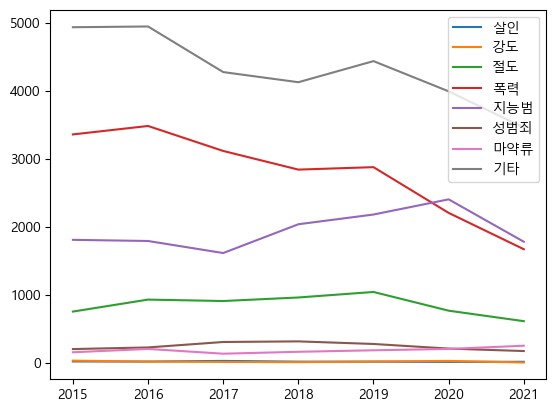

In [315]:
# 한글 데이터 처리 시 한글이 깨지는 경우 발생,
# matplotlib 에서 활용할 한글 폰트 설정 => 정상적으로 한글 출력

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

CrimeDF2.T.plot()

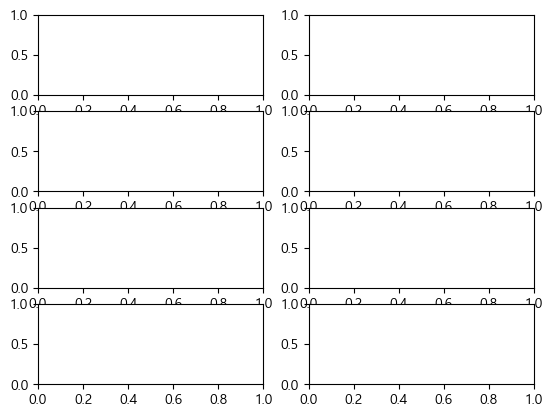

In [316]:
# (3) 각 범죄 종류별 그래프 그리기

import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(1,9):
    globals()[f'axes{i}']=fig.add_subplot(4,2, i)

# axes1 = fig.add_subplot(4,2,1)
# axes2 = fig.add_subplot(4,2,2)
# axes3 = fig.add_subplot(4,2,3)


In [317]:
# 1. 열의 데이터값 부르기

#<변수들>
# dataset_1 = CrimeDF2['살인'].values
# dataset_2 = CrimeDF2['강도'].values
# dataset_3 = CrimeDF2['절도'].values


# 문자를 변수를 바꾸는 것을 globals, 변수가 아닌것에는 globals 사용 X
for i in range(1,9):
    globals()[f'dataset_{i}']=CrimeDF2.loc[CrimeDF2.index[i-1]].values




# axes1.plot(ll, dataset_1)
# axes2.plot(ll, dataset_2)
# axes3.plot(ll, dataset_3)
ll = [i for i in range(2015,2022)]

for i in range(1,9):
    if i == 7:
      globals()[f'axes{i}'].plot(ll, globals()[f'dataset_{i}'], 'r-o')
    else:
        globals()[f'axes{i}'].plot(ll, globals()[f'dataset_{i}' ])

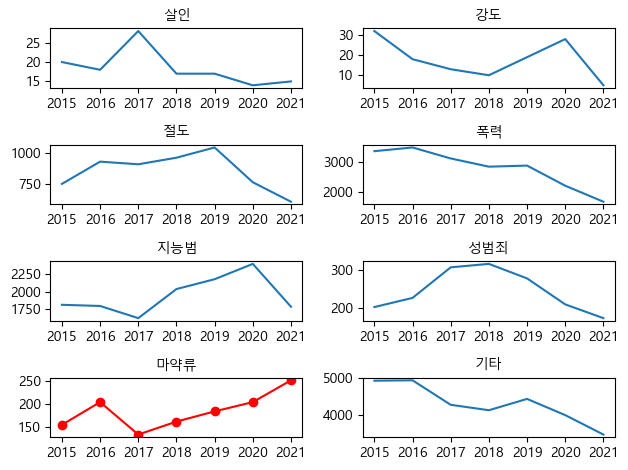

In [318]:
# 그래프 제목 설정하기-----------------------------------------------------------
# axes1.set_title("살인", size = 10)
# axes2.set_title("강도",size = 10)
# axes3.set_title("절도",size = 10) ...

for i in range(1,9):
  globals()[f'axes{i}'].set_title(CrimeDF2.index[i-1], size = 10)



# 그래프 X축 티켓이름 지정하기 ---------------------------------------------------
for i in range(1,9):
  globals()[f'axes{i}'].set_xticks([i for i in range(2015,2022)])



# 그래프 간격
fig.tight_layout()
fig

# 특이사항
# 마약류는 코로나 시점과 관계없이 꾸준히 증가하는 추세이다.
# 범죄 종류 중 마약류 범죄 증가. 마약의 수요와 공급

합계    10359.0
dtype: float64

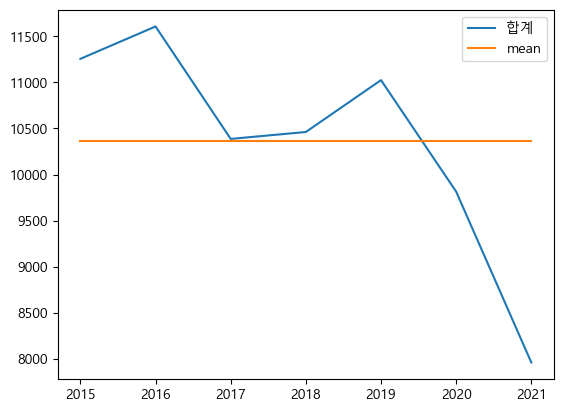

In [319]:
# 2. 행열 전환
c_t=TotalDF.T


# 외국인 범죄 발생량 & 평균값 그래프(2015 ~ 2021) -----------------------------------------------------------
# 평균값 구하기
c_t['mean']=TotalDF.mean(axis=1)[0]
c_t.plot()

TotalDF.mean(axis=1)   

# 코로나 이전과 이후로 비교 분석
# 코로나 이전 - 범죄량이 증가 혹은 평균. 즉, 범죄가 줄어들지 않음
# 코로나 이후 - 많이 범죄량이 줄어듦
# (단기 체류하는 외국인의 범죄량이 높지 않고 장기 체류하는 외국인의 범죄가 높을 것이다.)